In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import os 
import tqdm 
import random 
from keras.preprocessing.image import load_img   #for loading image and intialization 
warnings.filterwarnings('ignore')

In [47]:
input_path = []  #creating 2 lists                                               
label = []   

for class_name in os.listdir("/content/drive/MyDrive/Tree-noTree"):  #iterating directories                  
                             #class_name variable contains 2 values tree & no tree          
    for path in os.listdir("/content/drive/MyDrive/Tree-noTree/"+class_name): #iterarte each folder             
                                                                                
        if class_name == 'tree-1':
            label.append(1)
        else: 
            label.append(0)
        input_path.append(os.path.join(path))

print(input_path[0], label[0])

FJI_AC_720.png 0


In [48]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label  
#shuffle data 
df = df.sample(frac=1).reset_index(drop=True)  #reset_index in pandas is used to reset index of the dataframe object to default indexing (0 to number of rows minus 1) 
                                               #or to reset multi level index //frac keyword argument specifies the fraction of rows to return in the random sample
df.head() 

,images,label
0,FJI_AP_121.png,1
1,HAR_AD_484.png,0
2,HAR_AE_571.png,1
3,FJI_AP_588.png,1
4,FJI_AC_1088.png,0


In [49]:
df

,images,label
0,FJI_AP_121.png,1
1,HAR_AD_484.png,0
2,HAR_AE_571.png,1
3,FJI_AP_588.png,1
4,FJI_AC_1088.png,0
...,...,...
995,FJI_AP_637.png,1
996,TAN_CD_62.png,0
997,HAR_AD_154.png,0
998,TAN_AB_1068.png,0


In [51]:
df.to_csv(r'/content/saved_model/dataset2.csv', index=False)

In [ ]:
for i in df['images']:
    if '.png' not in i:
        print(i)

In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

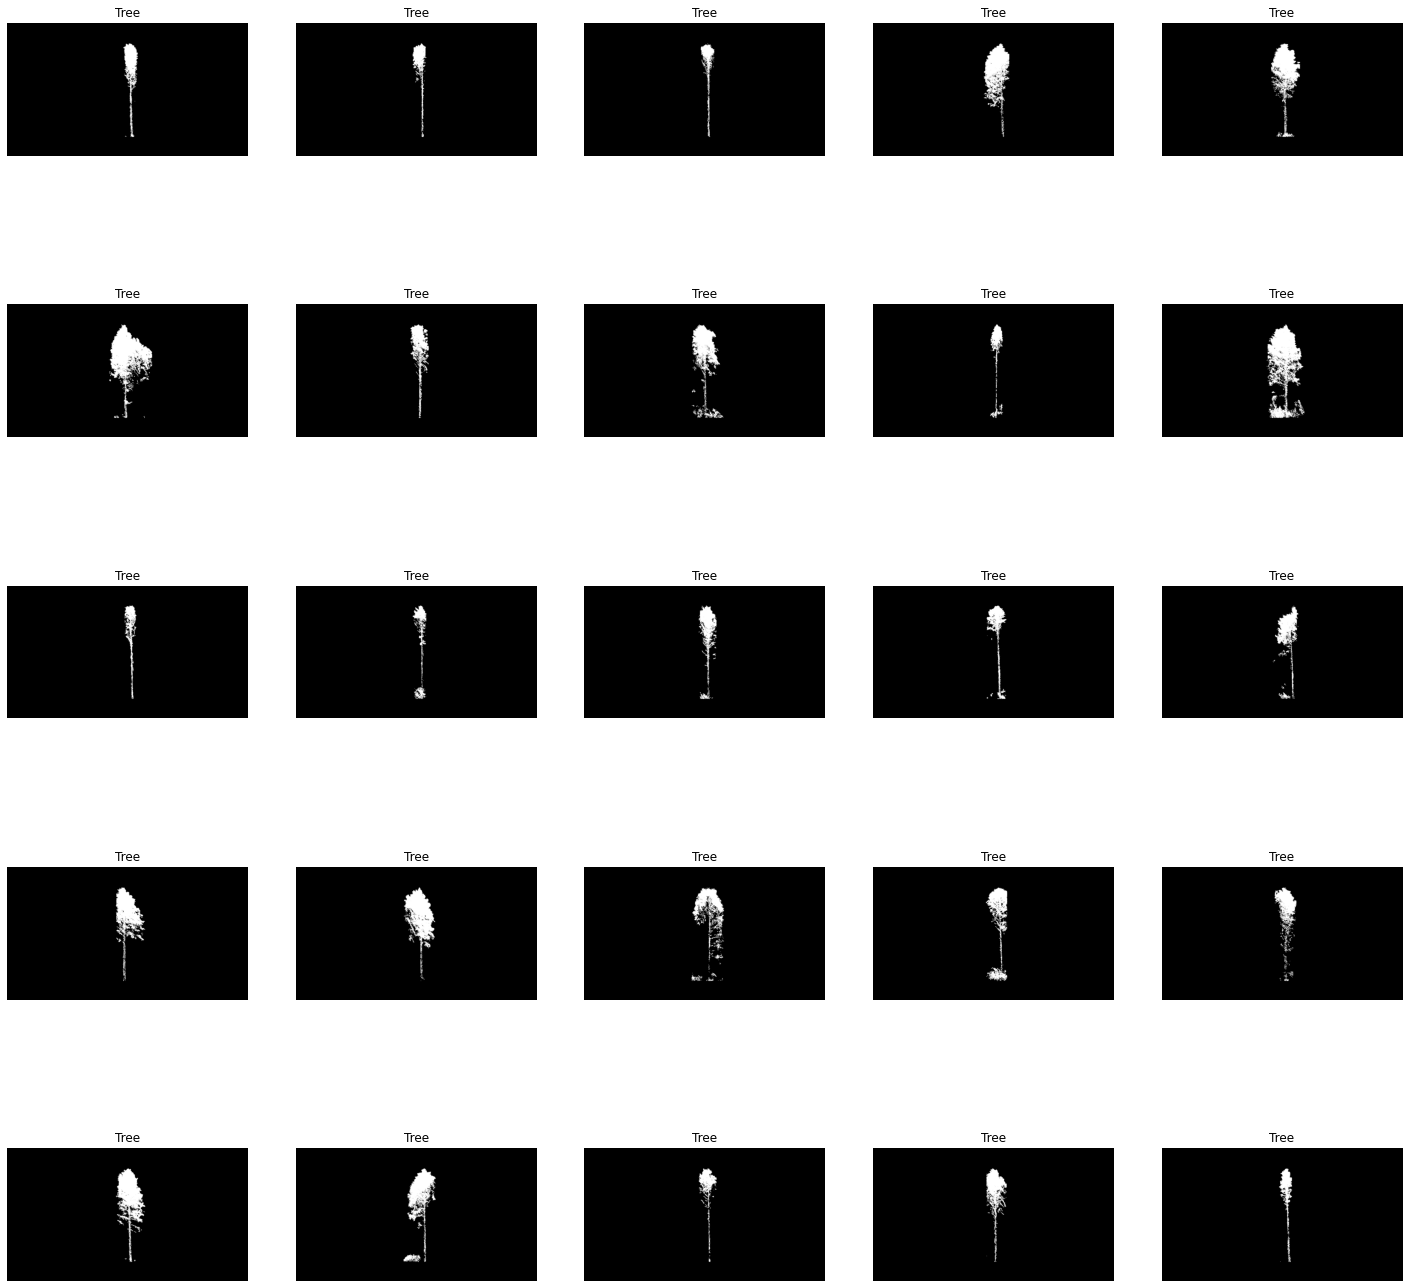

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img) #converting img to array
    plt.imshow(img)
    plt.title('Tree')
    plt.axis('off')

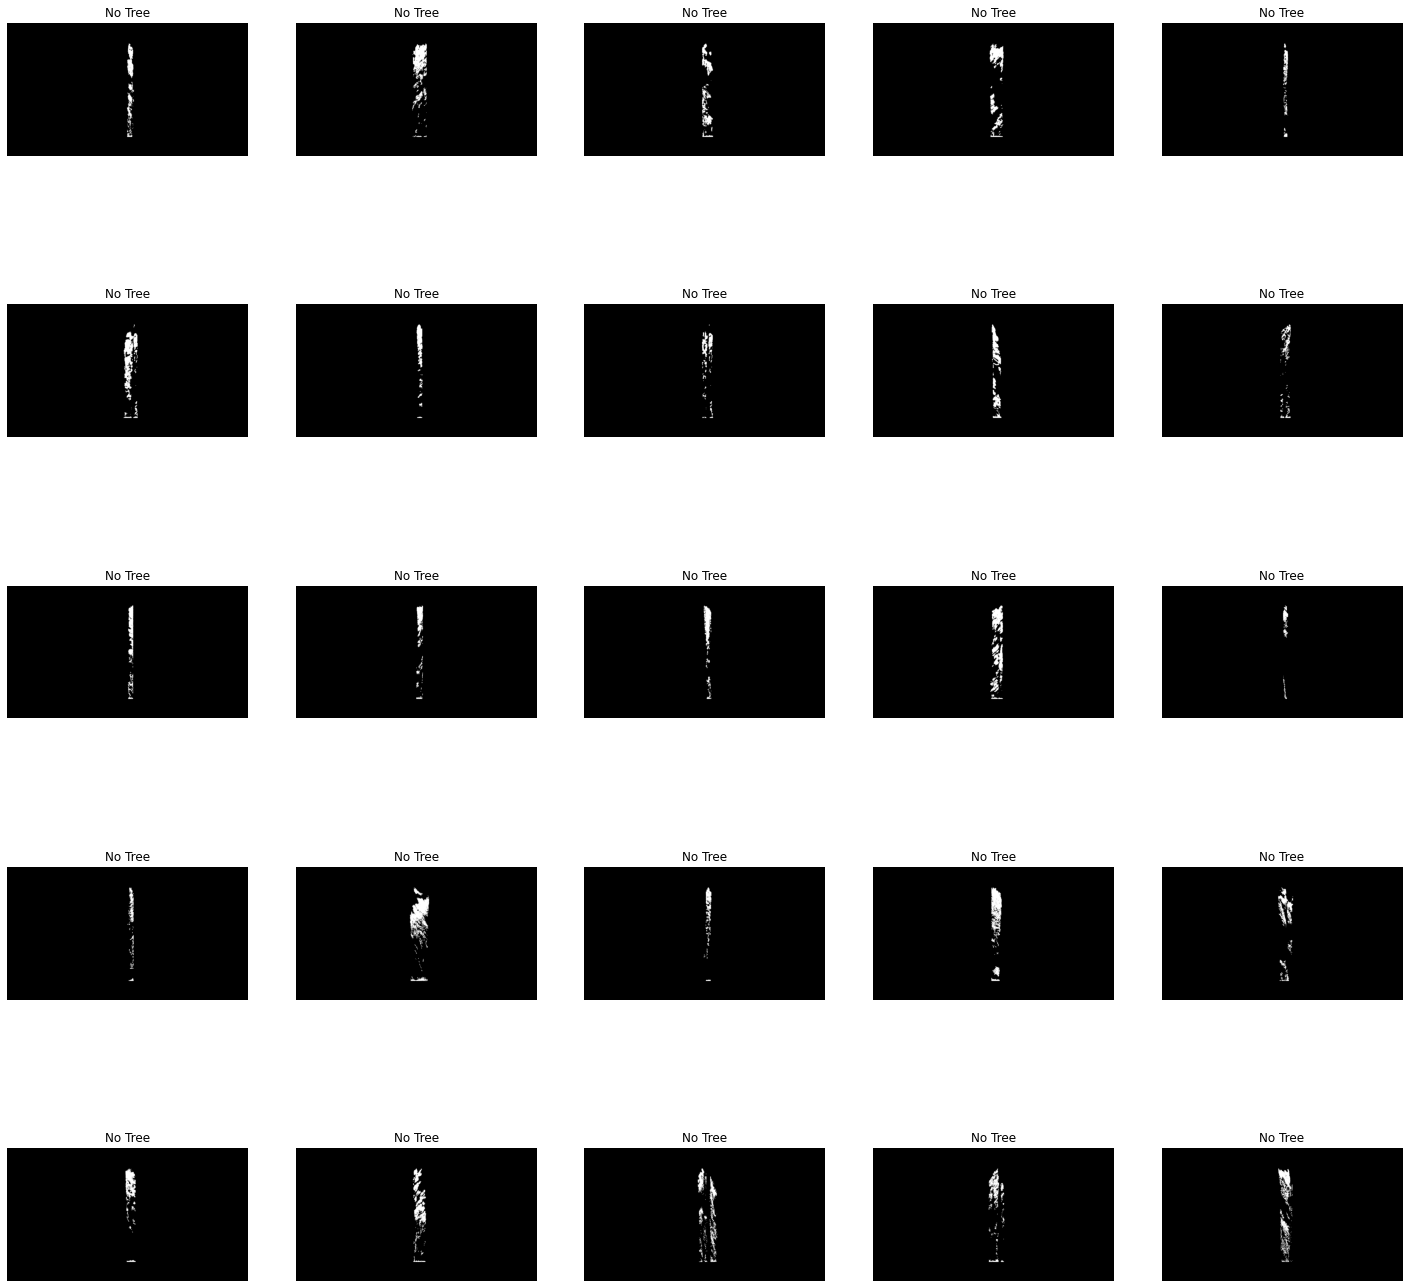

In [ ]:
# to display grid of images 
plt.figure(figsize=(25,25)) 
temp = df[df['label']==0]['images'] 
start = random.randint(0, len(temp)) 
files = temp[start:start+25] 

for index, file in enumerate(files):    #Enumeration means counting or reciting numbers or a numbered list
    plt.subplot(5,5, index+1) 
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('No Tree')
    plt.axis('off')

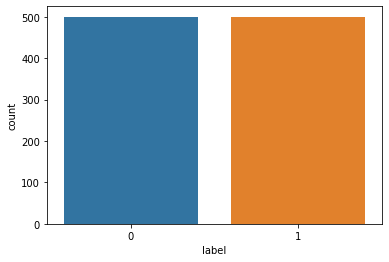

In [ ]:
import seaborn as sns   #see no. of classes 
sns.countplot(df['label'])  #output me can see equal no. of distribution in both

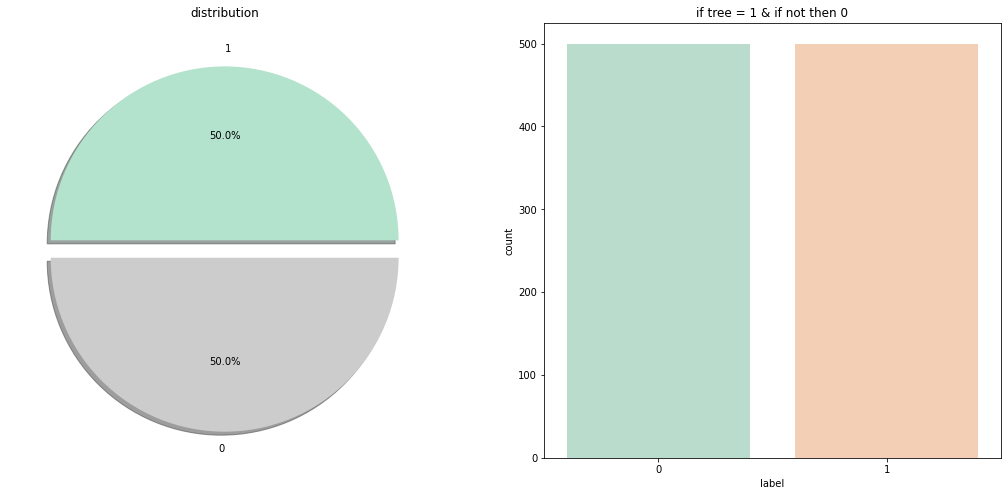

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap="Pastel2")
ax[0].set_title('distribution')
ax[0].set_ylabel('') 
import seaborn as sns
sns.countplot('label',data=df,ax=ax[1],palette="Pastel2")
ax[1].set_title('if tree = 1 & if not then 0') 
plt.show()

In [7]:
df['label'] = df['label'].astype('str')
df.head() 

,images,label
0,/content/drive/MyDrive/Tree-noTree/no tree-0/H...,0
1,/content/drive/MyDrive/Tree-noTree/tree-1/FJI_...,1
2,/content/drive/MyDrive/Tree-noTree/no tree-0/H...,0
3,/content/drive/MyDrive/Tree-noTree/tree-1/FJI_...,1
4,/content/drive/MyDrive/Tree-noTree/tree-1/FJI_...,1


In [8]:
df['label'] = df['label'].astype('str')
df.head() 

,images,label
0,/content/drive/MyDrive/Tree-noTree/no tree-0/H...,0
1,/content/drive/MyDrive/Tree-noTree/tree-1/FJI_...,1
2,/content/drive/MyDrive/Tree-noTree/no tree-0/H...,0
3,/content/drive/MyDrive/Tree-noTree/tree-1/FJI_...,1
4,/content/drive/MyDrive/Tree-noTree/tree-1/FJI_...,1


In [9]:
# input split  
from sklearn.model_selection import train_test_split  
train, test = train_test_split(df, test_size=0.2, random_state=42)  

In [10]:
from keras.preprocessing.image import ImageDataGenerator                                                                    
train_generator = ImageDataGenerator(                                                                                       
    rescale = 1.0/255,  # normalization of images                                                                              
    rotation_range = 40, # augmention of images to avoid overfitting                                                                             
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode = 'nearest'
) 

val_generator = ImageDataGenerator(rescale = 1.0/255) #for test data

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe( 
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
len(val_iterator)

1

In [ ]:
len(test)

200

In [ ]:
len(test)

200

In [ ]:
print(val_iterator.class_indices)

{'0': 0, '1': 1}


In [ ]:
img,labels = next(val_iterator)

In [11]:
#Model Creation
from keras import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense 

model = Sequential([  #arrange  layers in sequencial manner
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)), #here 16 are (hidden units) no of kernels/featureDetector/Filter
                                                        #3X3 is kernel size->filterMap//Resolution of image(128,128)*rbg(3)
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),  #for another layer
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),   #512 is no. of nuerons
                    Dense(1, activation='sigmoid')
])

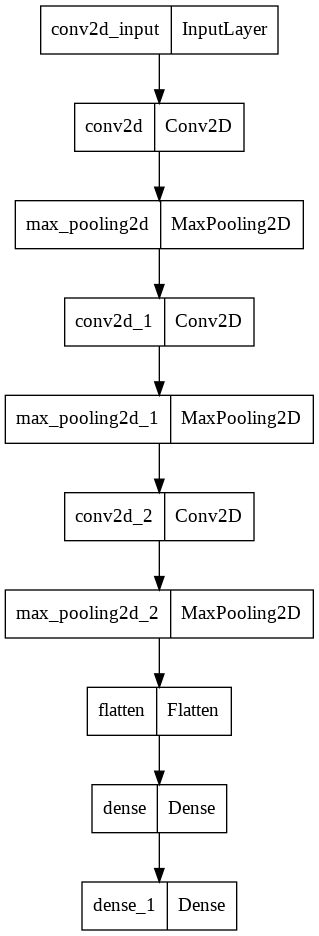

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
plot_model(model) 

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [13]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

In [14]:
history = model.fit(train_iterator, epochs=5, validation_data=val_iterator) 

Epoch 1/5
2/2 [==============================] - 184s 159s/step - loss: 0.7051 - accuracy: 0.5013 - val_loss: 0.6094 - val_accuracy: 0.7800
Epoch 2/5
2/2 [==============================] - 45s 30s/step - loss: 0.6176 - accuracy: 0.7513 - val_loss: 0.5354 - val_accuracy: 0.8150
Epoch 3/5
2/2 [==============================] - 44s 30s/step - loss: 0.5378 - accuracy: 0.8675 - val_loss: 0.4099 - val_accuracy: 0.8950
Epoch 4/5
2/2 [==============================] - 43s 19s/step - loss: 0.4375 - accuracy: 0.8612 - val_loss: 0.2549 - val_accuracy: 0.9500
Epoch 5/5
2/2 [==============================] - 45s 30s/step - loss: 0.3047 - accuracy: 0.9025 - val_loss: 0.1820 - val_accuracy: 0.9500


In [ ]:
history = model.fit(train_iterator, epochs=5, validation_data=val_iterator) 
#epochs is no. of  passes of the entire training dataset the machine learning algorithm has completed
#increases accuracy after 10 iterations 

Epoch 1/5
2/2 [==============================] - 50s 36s/step - loss: 0.3386 - accuracy: 0.8950 - val_loss: 0.3354 - val_accuracy: 0.8400
Epoch 2/5
2/2 [==============================] - 41s 26s/step - loss: 0.2829 - accuracy: 0.8950 - val_loss: 0.2223 - val_accuracy: 0.9000
Epoch 3/5
2/2 [==============================] - 40s 14s/step - loss: 0.2218 - accuracy: 0.9225 - val_loss: 0.7028 - val_accuracy: 0.7350
Epoch 4/5
2/2 [==============================] - 40s 26s/step - loss: 0.2655 - accuracy: 0.9000 - val_loss: 0.1199 - val_accuracy: 0.9600
Epoch 5/5
2/2 [==============================] - 45s 30s/step - loss: 0.2653 - accuracy: 0.9087 - val_loss: 0.1866 - val_accuracy: 0.9150


In [ ]:
model.evaluate(val_iterator) # in 1st run..

1/1 [==============================] - 6s 6s/step - loss: 0.0933 - accuracy: 0.9650


[0.09325174242258072, 0.9649999737739563]

In [15]:
model.evaluate(val_iterator) #again run

1/1 [==============================] - 6s 6s/step - loss: 0.1820 - accuracy: 0.9500


[0.18196888267993927, 0.949999988079071]

In [ ]:
model.evaluate(val_iterator) #again run caused overfitting

1/1 [==============================] - 6s 6s/step - loss: 0.1866 - accuracy: 0.9150


[0.18661755323410034, 0.9150000214576721]

In [16]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5') 

In [ ]:
%%time 
pred = model.predict(val_iterator) 

CPU times: user 11.4 s, sys: 201 ms, total: 11.6 s
Wall time: 11.5 s


In [ ]:
check = model.predict(val_iterator) 
check 

array([[0.43126863],
       [0.17387909],
       [0.5596074 ],
       [0.85293317],
       [0.18466598],
       [0.4609097 ],
       [0.50890785],
       [0.34733808],
       [0.80408365],
       [0.2857964 ],
       [0.503698  ],
       [0.81144   ],
       [0.25888973],
       [0.8215512 ],
       [0.20698231],
       [0.26034188],
       [0.8275684 ],
       [0.86020505],
       [0.13303408],
       [0.24296704],
       [0.36991403],
       [0.14721829],
       [0.30190897],
       [0.15645388],
       [0.20190623],
       [0.16993546],
       [0.52715623],
       [0.7239832 ],
       [0.77665055],
       [0.33343035],
       [0.48495787],
       [0.24909526],
       [0.7451939 ],
       [0.61470526],
       [0.60322577],
       [0.7897477 ],
       [0.14674526],
       [0.55885607],
       [0.39166132],
       [0.3425916 ],
       [0.25078836],
       [0.11612836],
       [0.8473272 ],
       [0.1582613 ],
       [0.8037932 ],
       [0.56038857],
       [0.41479868],
       [0.757

In [ ]:
tree_count=0
notree_count=0
for i in check:
  for j in i:
    if abs(i)==1:
      pred='yes tree- 1'
      tree_count+=1
    else:
      pred='no tree- 0'
      notree_count+=1

  print("Our model says it is :", pred)

print("total tree images : ",tree_count)
print("total no tree images : ",notree_count)

Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : yes tree- 1
Our model says it is : yes tree- 1
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : yes tree- 1
Our model says it is : no tree- 0
Our model says it is : yes tree- 1
Our model says it is : no tree- 0
Our model says it is : yes tree- 1
Our model says it is : yes tree- 1
Our model says it is : no tree- 0
Our model says it is : yes tree- 1
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : yes tree- 1
Our model says it is : yes tree- 1
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : no tree- 0
Our model says it is : yes tree- 1
Our model says it is : yes tree- 1
Our model says it is : yes tree- 1
Ou

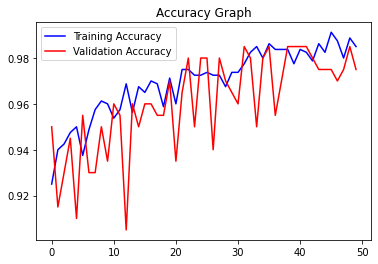

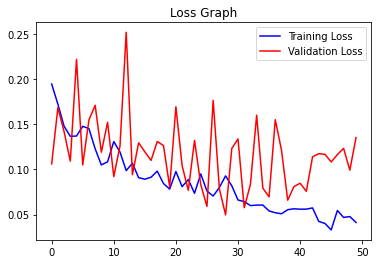

In [ ]:
#Visualization of Results#
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure() 

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()